Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df.tail(60)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8365,2012-10-21,Darwin,24.8,33.3,0.0,7.8,10.5,NW,41.0,ENE,...,58.0,50.0,1012.0,1007.2,2.0,1.0,29.5,31.7,No,No
8366,2012-10-22,Darwin,24.2,33.4,0.6,7.0,7.8,NW,33.0,NE,...,63.0,49.0,1011.2,1006.7,5.0,2.0,29.9,32.2,No,No
8367,2012-10-23,Darwin,24.2,35.2,0.6,5.2,11.5,NNE,35.0,S,...,67.0,40.0,1010.6,1006.2,1.0,1.0,28.6,33.6,No,No
8368,2012-10-24,Darwin,23.5,35.3,0.4,7.6,11.3,NNE,41.0,NE,...,69.0,41.0,1010.5,1005.7,4.0,2.0,29.6,34.3,No,No
8369,2012-10-25,Darwin,25.4,33.6,0.0,8.8,8.2,ESE,30.0,E,...,66.0,51.0,1011.3,1006.9,6.0,7.0,29.4,32.5,No,No
8370,2012-10-26,Darwin,24.7,34.3,0.2,5.8,10.0,NNW,35.0,NE,...,61.0,46.0,1011.1,1007.0,7.0,3.0,30.7,33.9,No,No
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8373,2012-10-29,Darwin,23.3,34.2,3.2,5.0,10.2,ENE,35.0,NE,...,60.0,56.0,1011.1,1007.0,3.0,2.0,29.9,32.0,Yes,No
8374,2012-10-30,Darwin,25.5,34.1,0.0,6.8,10.5,NNW,30.0,NNW,...,67.0,50.0,1010.9,1007.0,5.0,1.0,29.8,33.5,No,No


In [7]:
data=df.dropna()

In [8]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No
8382,2012-11-07,Darwin,26.2,33.3,0.0,6.0,5.9,N,54.0,ENE,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,No,Yes
8383,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,Yes,No
8384,2012-11-09,Darwin,25.5,33.1,0.0,4.8,7.1,SSE,37.0,E,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,No,No


In [9]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes


In [11]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


# checking datatypes of the columns

In [12]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

we can observe that the 'RainTomorrow' has continuous data but it is an object type. let us handle this column.

In [13]:
data['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['RainToday'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
data['WindDir3pm'].unique()

array(['ESE', 'S', 'ENE', 'NE', 'NNE', 'NNW', 'SE', 'SSE', 'SSW', 'WSW',
       'N', 'NW', 'E', 'W', 'WNW', 'SW'], dtype=object)

In [16]:
data['WindDir9am'].unique()

array(['SW', 'WSW', 'NNW', 'WNW', 'W', 'E', 'NW', 'NNE', 'N', 'SSW', 'S',
       'ESE', 'SSE', 'NE', 'SE', 'ENE'], dtype=object)

In [17]:
data['WindGustDir'].unique()

array(['ESE', 'E', 'WSW', 'ENE', 'NNE', 'NNW', 'S', 'SW', 'SSE', 'SSW',
       'SE', 'NE', 'N', 'NW', 'WNW', 'W'], dtype=object)

In [18]:
data['Location'].unique()

array(['CoffsHarbour', 'Williamtown', 'Melbourne', 'Brisbane',
       'PerthAirport', 'Darwin'], dtype=object)

In [19]:
data.shape[0]

3790

# Making DataFrame for the Nominal Data

In [20]:
data_visualization_nominal = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']].copy()

In [21]:
data_visualization_nominal.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Visualization of the Data

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns

In [22]:
import seaborn as sns

PerthAirport    1159
Melbourne       1126
CoffsHarbour     552
Brisbane         524
Darwin           249
Williamtown      180
Name: Location, dtype: int64


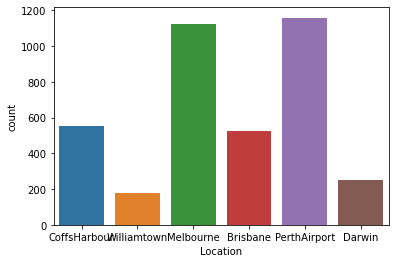

In [23]:
ax=sns.countplot(x='Location',data=data_visualization_nominal)
print(data_visualization_nominal['Location'].value_counts())

The no of rainfall in locations are
PerthAirport-1159
Melbourne-1126
CoffsHarbour-552
Brisbane-524
Darwin-249
Williamtown-180 times

N      449
E      408
SW     382
WSW    306
S      298
SSE    232
SSW    223
ENE    221
W      210
SE     195
NNE    185
ESE    176
NE     153
NW     125
WNW    119
NNW    108
Name: WindGustDir, dtype: int64


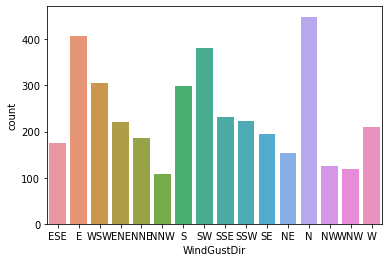

In [24]:
ax=sns.countplot(x='WindGustDir',data=data_visualization_nominal)
print(data_visualization_nominal['WindGustDir'].value_counts())

The direction of the strongest wind gust in the 24 hours to midnight
N- 449
E- 408
SW-382
WSW-306
S- 298
SSE-232
SSW-223
ENE-221
W-210
SE-195
NNE-185
ESE-176
NE-153
NW-125
WNW-119
NNW-108

N      547
SW     448
ENE    300
WSW    291
SSW    254
NNE    238
E      232
W      225
SE     192
NE     188
S      179
SSE    166
NW     140
WNW    137
NNW    134
ESE    119
Name: WindDir9am, dtype: int64


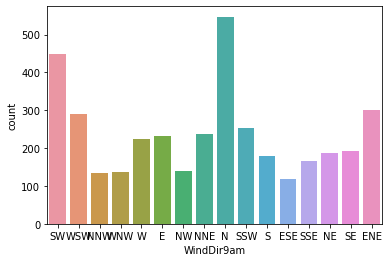

In [25]:
ax=sns.countplot(x='WindDir9am',data=data_visualization_nominal)
print(data_visualization_nominal['WindDir9am'].value_counts())

Direction of the wind at 9am 
N- 547
SW-448
ENE-300
WSW-291
SSW-254
NNE-238
E-232
W-225
SE-192
NE-188
S-179
SSE-166
NW-140
WNW-137
NNW-134
ESE-119

S      406
WSW    336
N      288
SW     284
SSE    283
E      258
W      226
SE     222
ESE    216
ENE    216
NE     213
NNE    197
SSW    187
WNW    161
NNW    157
NW     140
Name: WindDir3pm, dtype: int64


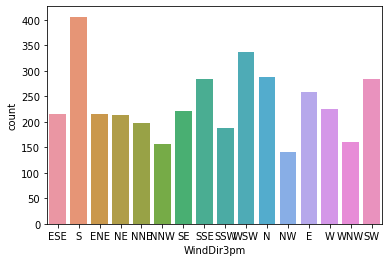

In [26]:
ax=sns.countplot(x='WindDir3pm',data=data_visualization_nominal)
print(data_visualization_nominal['WindDir3pm'].value_counts())

Direction of the wind at 3pm
S-406
WSW-336
N-288
SW-284
SSE-283
E-258
W-226
SE-222
ESE-216
ENE-216
NE-213
NNE-197
SSW-187
WNW-161
NNW-157
NW-140

No     2901
Yes     889
Name: RainToday, dtype: int64


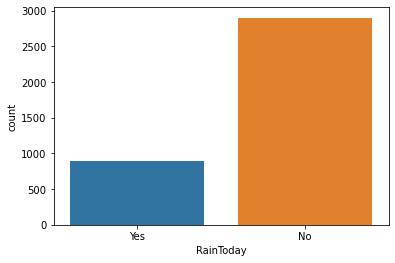

In [27]:
ax=sns.countplot(x='RainToday',data=data_visualization_nominal)
print(data_visualization_nominal['RainToday'].value_counts())

raintoday yes-889 times and no- 2901 times

No     2901
Yes     889
Name: RainTomorrow, dtype: int64


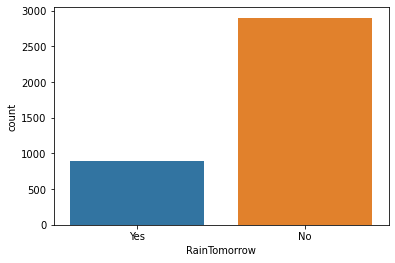

In [28]:
ax=sns.countplot(x='RainTomorrow',data=data_visualization_nominal)
print(data_visualization_nominal['RainTomorrow'].value_counts())

raintomorrow yes-889 times and no 2901 times

# Making DataFrame of the ordinal data

In [29]:
data_visualization_ordinal=data[["RainTomorrow","Rainfall"]].copy()

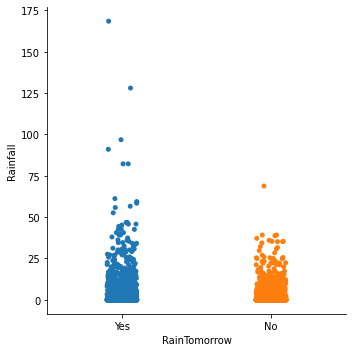

In [30]:
sns.catplot(x="RainTomorrow",y="Rainfall",data=data)

# Checking the distribution of the continuous values of the float type columns

In [31]:
data_visualization_continuous=data[["Rainfall","MinTemp"]].copy()

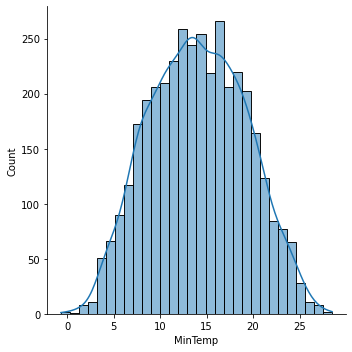

In [32]:
import seaborn as sns
sns.displot(data_visualization_continuous["MinTemp"],kde=True)

# Encoding of DataFrame:

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [111]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [35]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0.0,1.0,19.8,27.1,24.4,8.6,9.0,2.0,35.0,12.0,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1.0,1.0
908,1.0,1.0,18.7,25.6,6.8,3.8,3.4,0.0,33.0,12.0,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1.0,1.0
909,2.0,1.0,16.5,25.5,16.8,2.8,6.1,15.0,19.0,15.0,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1.0,0.0
910,3.0,1.0,18.5,26.9,0.0,3.2,11.0,1.0,30.0,12.0,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0.0,0.0
911,4.0,1.0,18.2,28.2,0.0,6.8,9.0,5.0,50.0,6.0,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276.0,2.0,25.2,34.5,3.0,4.0,9.2,5.0,39.0,3.0,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1.0,0.0
8382,1277.0,2.0,26.2,33.3,0.0,6.0,5.9,3.0,54.0,1.0,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0.0,1.0
8383,1278.0,2.0,24.9,32.8,20.4,6.2,8.7,14.0,37.0,5.0,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1.0,0.0
8384,1279.0,2.0,25.5,33.1,0.0,4.8,7.1,10.0,37.0,0.0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0.0,0.0


<AxesSubplot:>

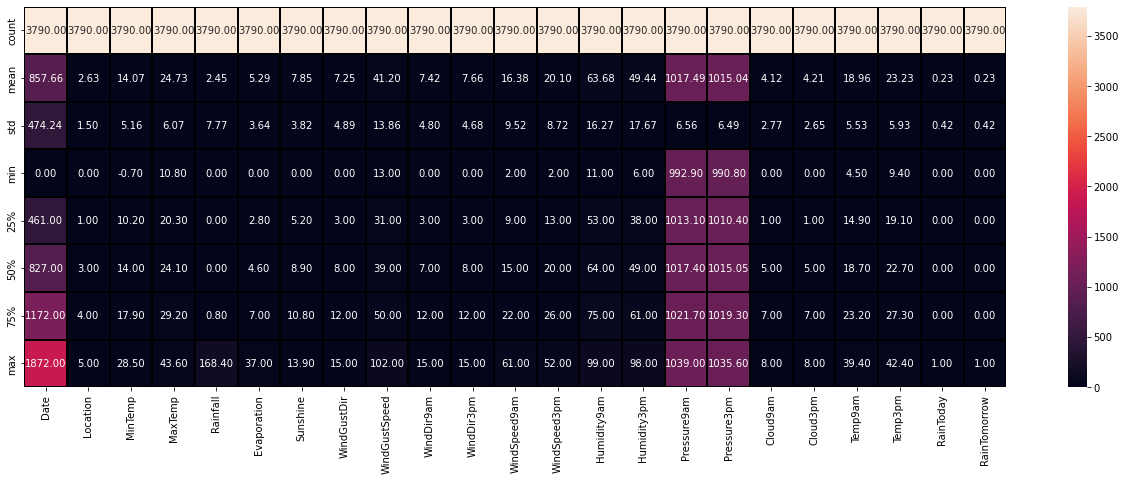

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [37]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.209654
Temp3pm         -0.092263
MaxTemp         -0.088906
Pressure9am     -0.080412
Pressure3pm     -0.037270
Temp9am         -0.007191
WindSpeed3pm     0.025185
Evaporation      0.043463
WindSpeed9am     0.051349
MinTemp          0.091642
WindGustSpeed    0.104999
Cloud3pm         0.159250
Cloud9am         0.195157
Humidity9am      0.231702
Humidity3pm      0.238730
Rainfall         1.000000
Name: Rainfall, dtype: float64

<AxesSubplot:>

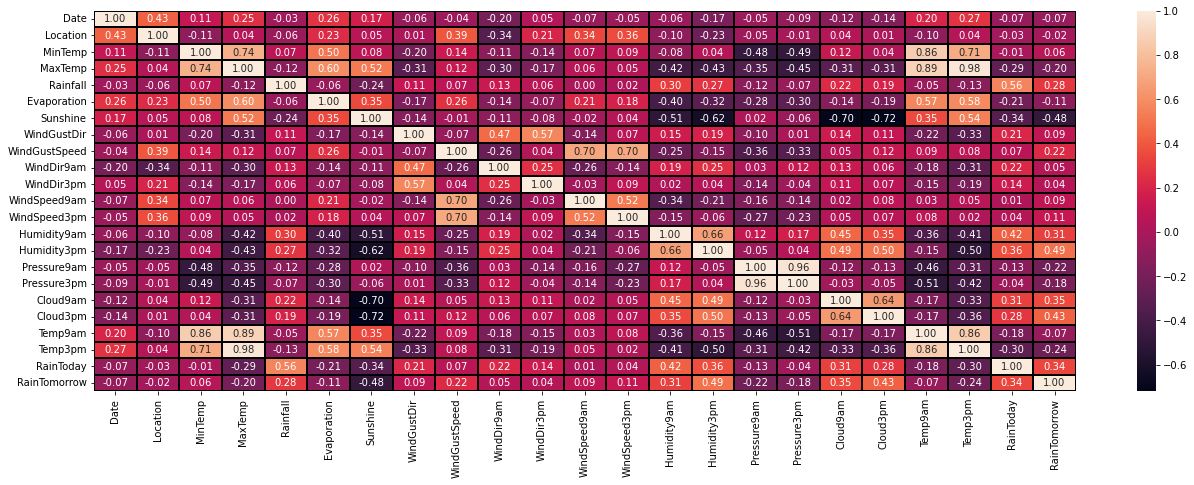

In [38]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negative correlated with the target columns.

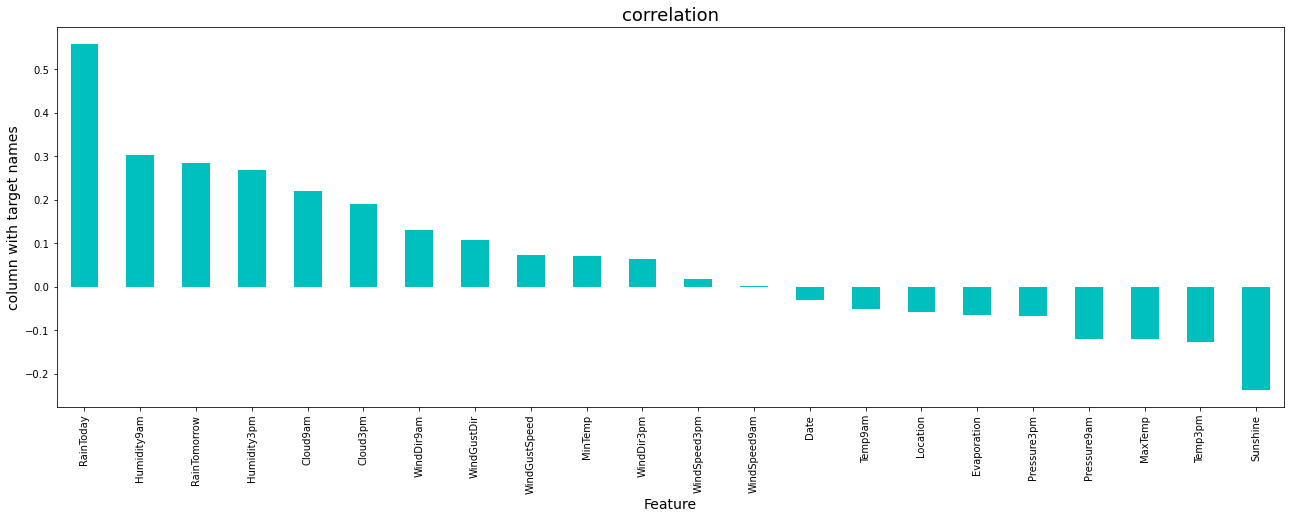

In [39]:
plt.figure(figsize=(22,7))
data.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [40]:
data.skew()

Date             0.343487
Location        -0.510193
MinTemp          0.039516
MaxTemp          0.237727
Rainfall         7.592966
Evaporation      2.114169
Sunshine        -0.591076
WindGustDir      0.004110
WindGustSpeed    0.699143
WindDir9am       0.030790
WindDir3pm      -0.054372
WindSpeed9am     0.935658
WindSpeed3pm     0.356434
Humidity9am     -0.194562
Humidity3pm      0.174915
Pressure9am      0.032381
Pressure3pm      0.096222
Cloud9am        -0.128711
Cloud3pm        -0.155781
Temp9am          0.029503
Temp3pm          0.239057
RainToday        1.253358
RainTomorrow     1.253358
dtype: float64

keeping +/-0.5 as the range for skewness,here are the columns which does not lie with in this range. RainToday- Categorical. Evaporation-Categorical. Sunshine-Categorical. WindGustSpeed-Categorical. Rainfall-target variable. RainTomorrow-Categorical.

Since no column has skewness,we will not treat that.

# Outliers Check:

In [41]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Checking the outliers on the float type of columns.

<AxesSubplot:>

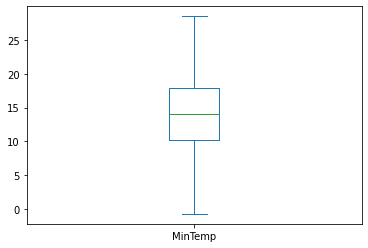

In [42]:
data['MinTemp'].plot.box()

<AxesSubplot:>

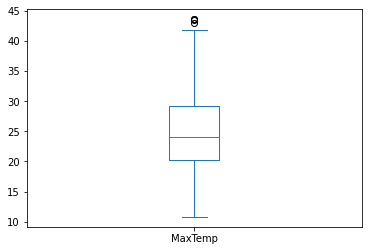

In [43]:
data['MaxTemp'].plot.box()

<AxesSubplot:>

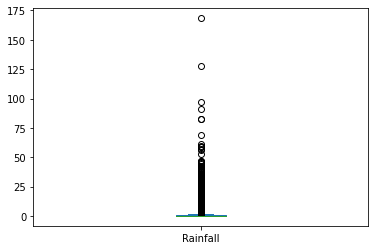

In [44]:
data['Rainfall'].plot.box()

<AxesSubplot:>

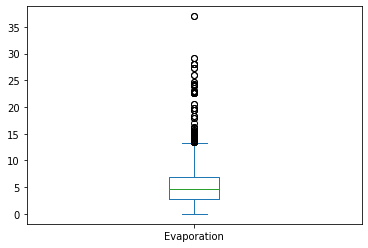

In [45]:
data['Evaporation'].plot.box()

<AxesSubplot:>

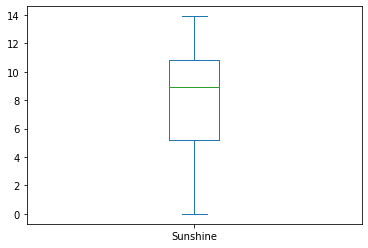

In [46]:
data['Sunshine'].plot.box()

<AxesSubplot:>

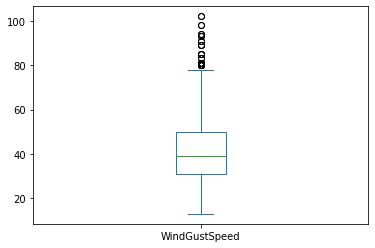

In [47]:
data['WindGustSpeed'].plot.box()

<AxesSubplot:>

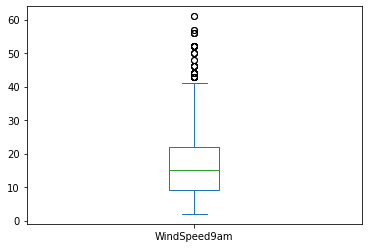

In [48]:
data['WindSpeed9am'].plot.box()

<AxesSubplot:>

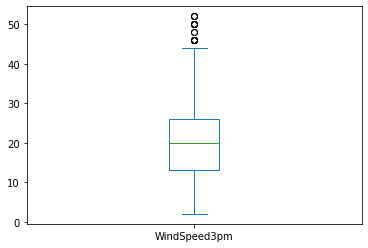

In [49]:
data['WindSpeed3pm'].plot.box()

<AxesSubplot:>

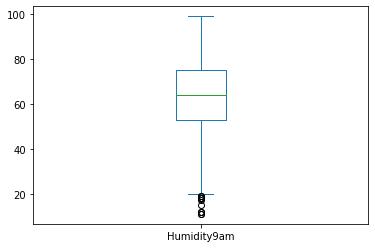

In [50]:
data['Humidity9am'].plot.box()

<AxesSubplot:>

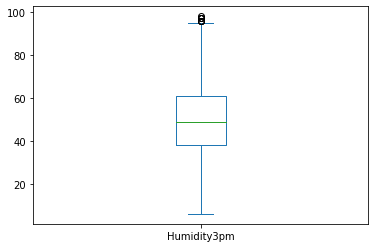

In [51]:
data['Humidity3pm'].plot.box()

<AxesSubplot:>

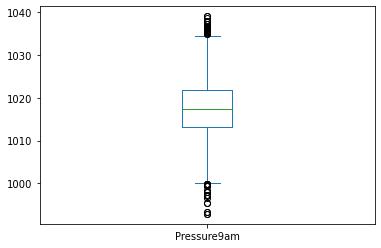

In [52]:
data['Pressure9am'].plot.box()

<AxesSubplot:>

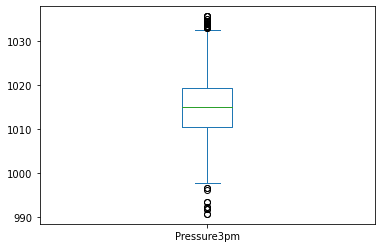

In [53]:
data['Pressure3pm'].plot.box()

<AxesSubplot:>

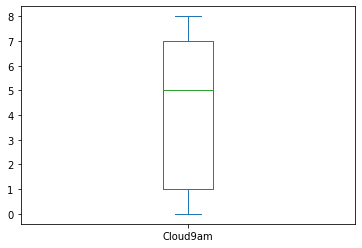

In [54]:
data['Cloud9am'].plot.box()

<AxesSubplot:>

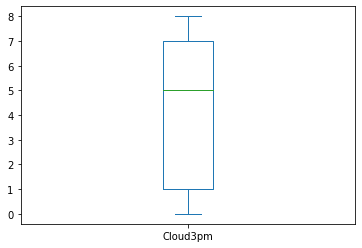

In [55]:
data['Cloud3pm'].plot.box()

<AxesSubplot:>

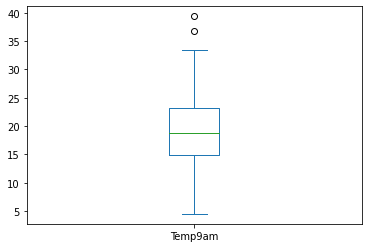

In [56]:
data['Temp9am'].plot.box()

<AxesSubplot:>

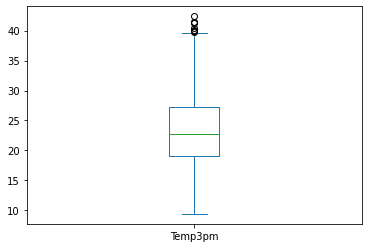

In [57]:
data['Temp3pm'].plot.box()

# Considering the outlier remove.

In [58]:
data.shape

(3790, 23)

In [59]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  26,   39,   41,   67,   88,  252,  253,  311,  312,  402,  403,
         456,  457,  458,  517,  518,  536,  548,  557,  564,  564,  567,
         571,  574,  578,  582,  583,  586,  587,  589,  592,  596,  599,
         603,  606,  610,  613,  617,  620,  624,  631,  647,  654,  654,
         657,  661,  664,  668,  672,  673,  676,  677,  679,  682,  686,
         689,  693,  696,  700,  703,  707,  710,  714,  721,  734,  734,
         769,  771,  820,  820,  821,  840,  851,  858,  873,  874,  875,
         879,  879,  931,  971,  976,  976,  991, 1007, 1025, 1025, 1029,
        1041, 1041, 1041, 1042, 1046, 1064, 1068, 1071, 1071, 1096, 1108,
        1112, 1124, 1135, 1149, 1224, 1224, 1227, 1237, 1238, 1238, 1239,
        1239, 1239, 1247, 1264, 1265, 1273, 1286, 1288, 1289, 1289, 1297,
        1297, 1332, 1334, 1383, 1383, 1384, 1403, 1414, 1421, 1436, 1437,
        1438, 1442, 1442, 1494, 1534, 1539, 1539, 1554, 1570, 1588, 1588,
        1592, 1604, 1604, 1604, 1605, 

In [60]:
df_new_z=data[(z<3).all(axis=1)]
df_new_z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0.0,1.0,19.8,27.1,24.4,8.6,9.0,2.0,35.0,12.0,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1.0,1.0
908,1.0,1.0,18.7,25.6,6.8,3.8,3.4,0.0,33.0,12.0,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1.0,1.0
909,2.0,1.0,16.5,25.5,16.8,2.8,6.1,15.0,19.0,15.0,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1.0,0.0
910,3.0,1.0,18.5,26.9,0.0,3.2,11.0,1.0,30.0,12.0,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0.0,0.0
911,4.0,1.0,18.2,28.2,0.0,6.8,9.0,5.0,50.0,6.0,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276.0,2.0,25.2,34.5,3.0,4.0,9.2,5.0,39.0,3.0,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1.0,0.0
8382,1277.0,2.0,26.2,33.3,0.0,6.0,5.9,3.0,54.0,1.0,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0.0,1.0
8383,1278.0,2.0,24.9,32.8,20.4,6.2,8.7,14.0,37.0,5.0,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1.0,0.0
8384,1279.0,2.0,25.5,33.1,0.0,4.8,7.1,10.0,37.0,0.0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0.0,0.0


In [61]:
df_new_z.shape

(3592, 23)

# percentage loss of data:

In [62]:
Data_loss = ((3790-3592)/3790)*100

In [63]:
Data_loss

5.224274406332454

# Separating the columns into features and targets:

In [64]:
features=data.drop('Rainfall',axis=1)
target=data['Rainfall']

# Scaling the data using min-max Scaler:

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
for i in range (0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3507064918794759
At random state 0,the testing accuracy is:- 0.30602105871629015


At random state 1,the training accuracy is:- 0.3867402671835216
At random state 1,the testing accuracy is:- 0.257898621025323


At random state 2,the training accuracy is:- 0.32456843726502294
At random state 2,the testing accuracy is:- 0.4266175101127828


At random state 3,the training accuracy is:- 0.346075110650943
At random state 3,the testing accuracy is:- 0.3217154219461482


At random state 4,the training accuracy is:- 0.3253012798662357
At random state 4,the testing accuracy is:- 0.4478274346782617


At random state 5,the training accuracy is:- 0.3412029877417053
At random state 5,the testing accuracy is:- 0.33861831100022133


At random state 6,the training accuracy is:- 0.33423936738899296
At random state 6,the testing accuracy is:- 0.37333167846878557


At random state 7,the training accuracy is:- 0.3950420924118705
At random state 7,the testing 

In [68]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [69]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [70]:
pred_test=lr.predict(features_test)

In [71]:
print(r2_score(target_test,pred_test))

0.3037403781429867


# Cross-validation of the model

In [72]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.31611304980940574 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 3 the cv score is 0.3382803566275155 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 4 the cv score is 0.31266423281916256 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 5 the cv score is 0.35020172474926714 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 6 the cv score is 0.3391211415553846 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 7 the cv score is 0.35860514365082696 and accuracy score for training is -0.34491712417639553 and accuracy for the testing is 0.3037403781429867


At cross fold 8 the cv score is 0.34

Since the number of fold do not have such impact on the accuracy and cv_score. so cv=5 is selected.

Here we have handled the problem of overfitting and checking the training and testing score.

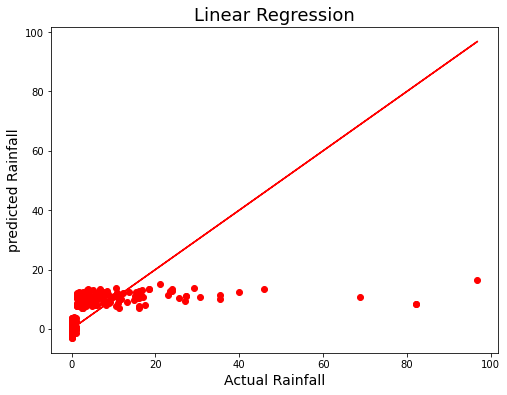

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color="r")
plt.xlabel('Actual Rainfall',fontsize=14)
plt.ylabel('predicted Rainfall',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the data points which shows good fit of our model.

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.linear_model import Lasso


parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
              'random_state': list(range(0,10))}

ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


# final model training

In [76]:
ls  = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

22.17385952977783

In [77]:
pred_ls = ls.predict(features_test)

In [78]:
lss=r2_score(target_test,pred_ls)
lss*100

17.300572533974123

In [79]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

20.887860250163065

# Ensemble technique:

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'sqrt'}


In [81]:
rf =RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 46.68160567352876
Cross Val Score: 37.38833357764603


# We are getting model accuracy and cross validation both as 37.38 which shows our model is performing not  extremely well

In [82]:
import pickle
filename = 'Rainfall.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Conclusion

In [83]:
loaded_model = pickle.load(open('Rainfall.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

46.68160567352876


In [84]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["predicted","Orginal"])

In [85]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
predicted,0.01,0.008,0.012,0.024,0.014,7.762,0.176,0.16,5.48,0.216,...,0.022,8.352,0.016,0.162,0.0,0.0,0.016,8.814,0.194,0.0
Orginal,0.01,0.008,0.012,0.024,0.014,7.762,0.176,0.16,5.48,0.216,...,0.022,8.352,0.016,0.162,0.0,0.0,0.016,8.814,0.194,0.0


# RainfallTomorrow

# Separating the columns into features and targets:

In [86]:
features=data.drop('RainTomorrow',axis=1)
target=data['RainTomorrow']

# Scaling the data using min-max Scaler:

In [87]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
for i in range (0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.4023119399625529
At random state 0,the testing accuracy is:- 0.4311791781531431


At random state 1,the training accuracy is:- 0.3960667498075866
At random state 1,the testing accuracy is:- 0.4459560176699823


At random state 2,the training accuracy is:- 0.409093423737814
At random state 2,the testing accuracy is:- 0.4046291076007571


At random state 3,the training accuracy is:- 0.39913393137285536
At random state 3,the testing accuracy is:- 0.4421617792625592


At random state 4,the training accuracy is:- 0.41173538374264385
At random state 4,the testing accuracy is:- 0.39256473692130456


At random state 5,the training accuracy is:- 0.4048399876010482
At random state 5,the testing accuracy is:- 0.42155671963797736


At random state 6,the training accuracy is:- 0.42021548142793175
At random state 6,the testing accuracy is:- 0.3571838235441529


At random state 7,the training accuracy is:- 0.4204643171818274
At random state 7,the testing

In [90]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [91]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [92]:
pred_test=lr.predict(features_test)

In [93]:
print(r2_score(target_test,pred_test))

0.4073235088515137


# Cross-validation of the model

In [94]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.3587211073886204 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 3 the cv score is 0.36839513604339574 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 4 the cv score is 0.37667241405186136 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 5 the cv score is 0.37434456566942903 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 6 the cv score is 0.37529445714899196 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 7 the cv score is 0.38169564361302605 and accuracy score for training is -0.3958703287862664 and accuracy for the testing is 0.4073235088515137


At cross fold 8 the cv score is 0.3746432

Since the number of fold do not have such impact on the accuracy and cv_score. so cv=5 is selected.

Here we have handled the problem of overfitting and checking the training and testing score.

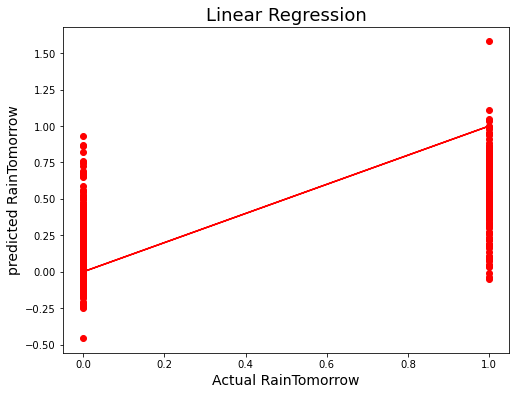

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color="r")
plt.xlabel('Actual RainTomorrow',fontsize=14)
plt.ylabel('predicted RainTomorrow',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the data points which shows good fit of our model.

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [97]:
from sklearn.linear_model import Lasso


parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
              'random_state': list(range(0,10))}

ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


# final model training

In [98]:
ls  = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

27.33308616602985

In [99]:
pred_ls = ls.predict(features_test)

In [100]:
lss=r2_score(target_test,pred_ls)
lss*100

27.10866781741681

In [101]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

26.44221324023894

# Ensemble technique:

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'sqrt'}


In [103]:
rf =RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 58.16154242541651
Cross Val Score: 48.65146100354372


# We are getting model accuracy and cross validation both as 48.65 which shows our model is performing not extremely well

In [104]:
import pickle
filename = 'RainTomorrow.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Conclusion

In [105]:
loaded_model = pickle.load(open('RainTomorrow.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

58.16154242541651


In [108]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["predicted","Orginal"])

In [110]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
predicted,0.0,0.52,0.12,0.03,0.03,0.15,0.43,0.89,0.06,0.08,...,0.43,0.78,0.03,0.94,0.12,0.0,0.12,0.51,0.33,0.04
Orginal,0.0,0.52,0.12,0.03,0.03,0.15,0.43,0.89,0.06,0.08,...,0.43,0.78,0.03,0.94,0.12,0.0,0.12,0.51,0.33,0.04
